# KeyWordSpotting - LIVE DEMO

In [2]:
#Imports
import librosa
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import Models #Our models
#.......................

## 1) Audio Input
### Recording from microphone

In [ ]:
sr = 16000
seconds = 10

myrec = sd.rec(int(sr*seconds), samplerate=sr, channels=1)
sd.wait()

np.save('LiveDemo/myrec.npy', myrec)

### Reading it from a numpy array

In [3]:
sr=16000
#myrec = np.load("LiveDemo/ONaudioclip.npy")
myrec = np.load("LiveDemo/myrec.npy")

### Reading it from a wav file

In [ ]:
myrec, sr = librosa.load("LiveDemo/audioclip.wav", sr=None)

### Audio Clip Informations

Sample rate =	16000 samples/s
Duration t =	10.0 s
Average intensity =	 0.006289102


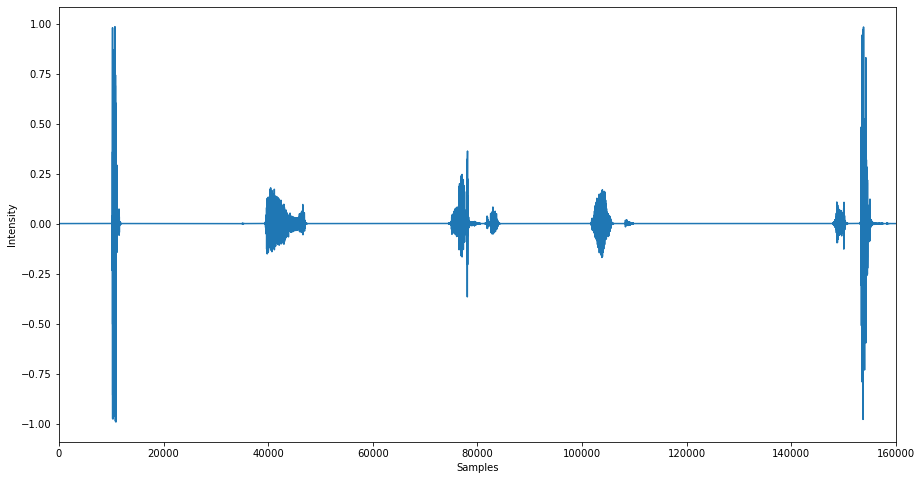

In [4]:
print("Sample rate =\t" + str(sr) + " samples/s")
print("Duration t =\t" + str(len(myrec) / sr) + " s")
print("Average intensity =\t",np.mean(np.abs(myrec)))

# Play it
play = True
if play:
    sd.play(myrec, sr)
    
# Plot
plt.figure(figsize=(15, 8))
plt.plot(myrec)
plt.xlabel("Samples")
plt.ylabel("Intensity")
plt.xlim(0, len(myrec))
plt.show()

## 2) Load Model

## 3) ...

### Silince Filter

In [ ]:
#......

### Sliding Window
A 1 second window will slide left to right with a step of 1600 samples (100ms) in order to have 10 windows per second 



Number of windows: 28
Step: 5333
(28, 16000, 1)
(28, 16000, 1)
Window 0 Pred 0.014262969970703126
Window 1 Pred 0.01427997589111328
Window 2 Pred 0.006429933547973633
Window 3 Silence 5.874252319335937e-05
Window 4 Silence 6.085205078125e-05
Window 5 Pred 0.007091419219970703
Window 6 Pred 0.01252119255065918
Window 7 Pred 0.012517988204956055
Window 8 Pred 0.0054906558990478515
Window 9 Silence 5.1849365234375e-05
Window 10 Silence 4.8517227172851565e-05
Window 11 Silence 4.9676895141601566e-05
Window 12 Pred 0.007381858825683593
Window 13 Pred 0.00870772361755371
Window 14 Pred 0.00870103645324707
Window 15 Pred 0.0013686809539794921
Window 16 Silence 4.266357421875e-05
Window 17 Pred 0.005991168975830078
Window 18 Pred 0.0061666049957275395
Window 19 Pred 0.006165679931640625
Window 20 Silence 0.0002176227569580078
Window 21 Silence 4.138946533203125e-05
Window 22 Silence 3.992271423339844e-05
Window 23 Silence 4.0113449096679685e-05
Window 24 Silence 4.041671752929688e-05
Window 25

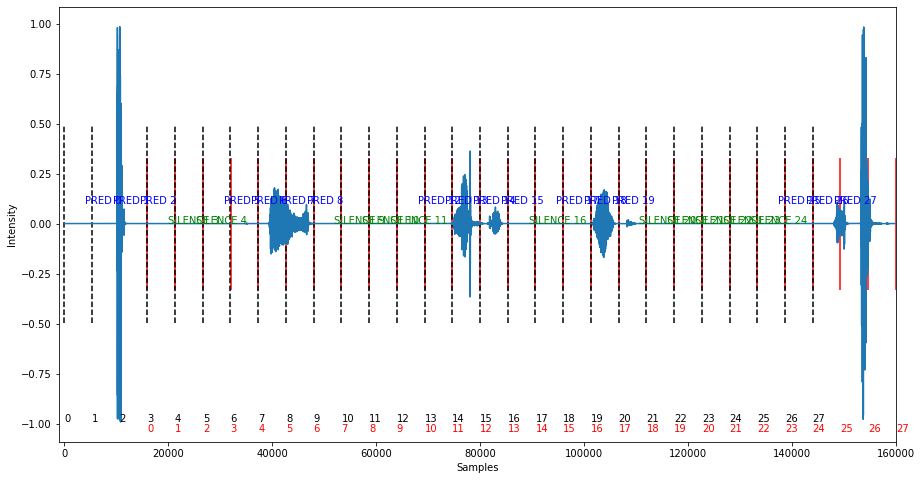

In [6]:
if len(myrec.shape)<2: myrec=myrec[...,np.newaxis] # for the 1 sec audios

ws=3 #windows per second

step=int(sr/ws)
nwin=int((len(myrec)-sr)/step)+1 #number of windows
windows=np.empty((nwin,sr,1))
predictions=np.empty((nwin,sr,1))

print("Number of windows:",nwin)
print("Step:",step)
print(windows.shape)
print(predictions.shape)

#divide in windows
for i in range(nwin):
    start=int(i*step)
    end=int(start+sr)
    windows[i]=myrec[start:end]

    
# Plot
plt.figure(figsize=(15, 8))
plt.plot(myrec)
plt.xlabel("Samples")
plt.ylabel("Intensity")
plt.xlim(-1000, len(myrec))
for i in range(nwin):
    start=int(i*step)
    plt.vlines(start, np.min(myrec)/2, np.max(myrec)/2, colors='k',linestyles='dashed')
    plt.vlines(start+sr, np.min(myrec)/3, np.max(myrec)/3, colors='r')
    plt.text(start, np.min(myrec), i)
    plt.text(start+sr, np.min(myrec)-0.05, i, color='red')
    
    #SILENCE FILTER
    if np.mean(np.abs(windows[i]))<(10**-3):
        predictions[i]=-1 #Silence
        plt.text(start+sr/4, 0, "SILENCE "+str(i), color='green')
        print("Window",i,"Silence",np.mean(np.abs(windows[i])))
    else:
        #predictions[i]=model.predict(windows[i])
        plt.text(start+sr/4, 0.1, "PRED "+str(i), color='blue')
        print("Window",i,"Pred",np.mean(np.abs(windows[i])))

plt.show()



### Fusion Rule

In [ ]:
#....